Heart Attack Prediction Model

1. Data Preprocessing

In [1]:
#1.1 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
#1.2 Load Data set
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [3]:
#1.3 Understand the data
# check the count of feature and data
df.shape

(8763, 26)

In [4]:
# Get the information about data like features, Datatype, count of data in each feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
Details about features.

Patient ID - Unique identifier for each patient
Age - Age of the patient
Sex - Gender of the patient (Male/Female)
Cholesterol - Cholesterol levels of the patient
Blood Pressure - Blood pressure of the patient (systolic/diastolic)
Heart Rate - Heart rate of the patient
Diabetes - Whether the patient has diabetes (Yes/No)
Family History - Family history of heart-related problems (1: Yes, 0: No)
Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
Exercise Hours Per Week - Number of exercise hours per week
Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
Medication Use - Medication usage by the patient (1: Yes, 0: No)
Stress Level - Stress level reported by the patient (1-10)
Sedentary Hours Per Day - Hours of sedentary activity per day
Income - Income level of the patient
BMI - Body Mass Index (BMI) of the patient
Triglycerides - Triglyceride levels of the patient
Physical Activity Days Per Week - Days of physical activity per week
Sleep Hours Per Day - Hours of sleep per day
Country - Country of the patient
Continent - Continent where the patient resides
Hemisphere - Hemisphere where the patient resides
Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

In [5]:
# To check is there any null value or not.
# There is no null value.
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
# To Show top 5 Rows with data to understand feature values.
df.head() 

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
# Check the data type of each columns.
df.dtypes 

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [8]:
# Convert text data in to numeric data to better understanding.
# Sex Column data Male = 1 and Female = 0
df['Sex'].replace('Male',1,inplace=True)
df['Sex'].replace('Female',0,inplace=True)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [9]:
# Change the data type of Sex column from text to numeric

df['Sex'] = pd.to_numeric(df['Sex'])
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [10]:
# There is Two type of data available in Blood Pressure column.
# We are going to divide it in to 2 columns BP_systolic and BP_diastolic

df['BP_systolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[0])
df['BP_diastolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[1])
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [11]:
# Check the all Columns name
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'BP_systolic',
       'BP_diastolic'],
      dtype='object')

In [12]:
# Rearrange the columns

df = df[['Age', 'Sex', 'Cholesterol', 
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
df.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,1,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,0,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,1,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,1,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [13]:
#data types of systolic and diastolic blood pressure is object. change it to int

df['BP_systolic'] = pd.to_numeric(df['BP_systolic'])
df['BP_diastolic'] = pd.to_numeric(df['BP_diastolic'])
df.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

C:\Users\RaThoD\AppData\Local\Temp\ipykernel_9152\3929169510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


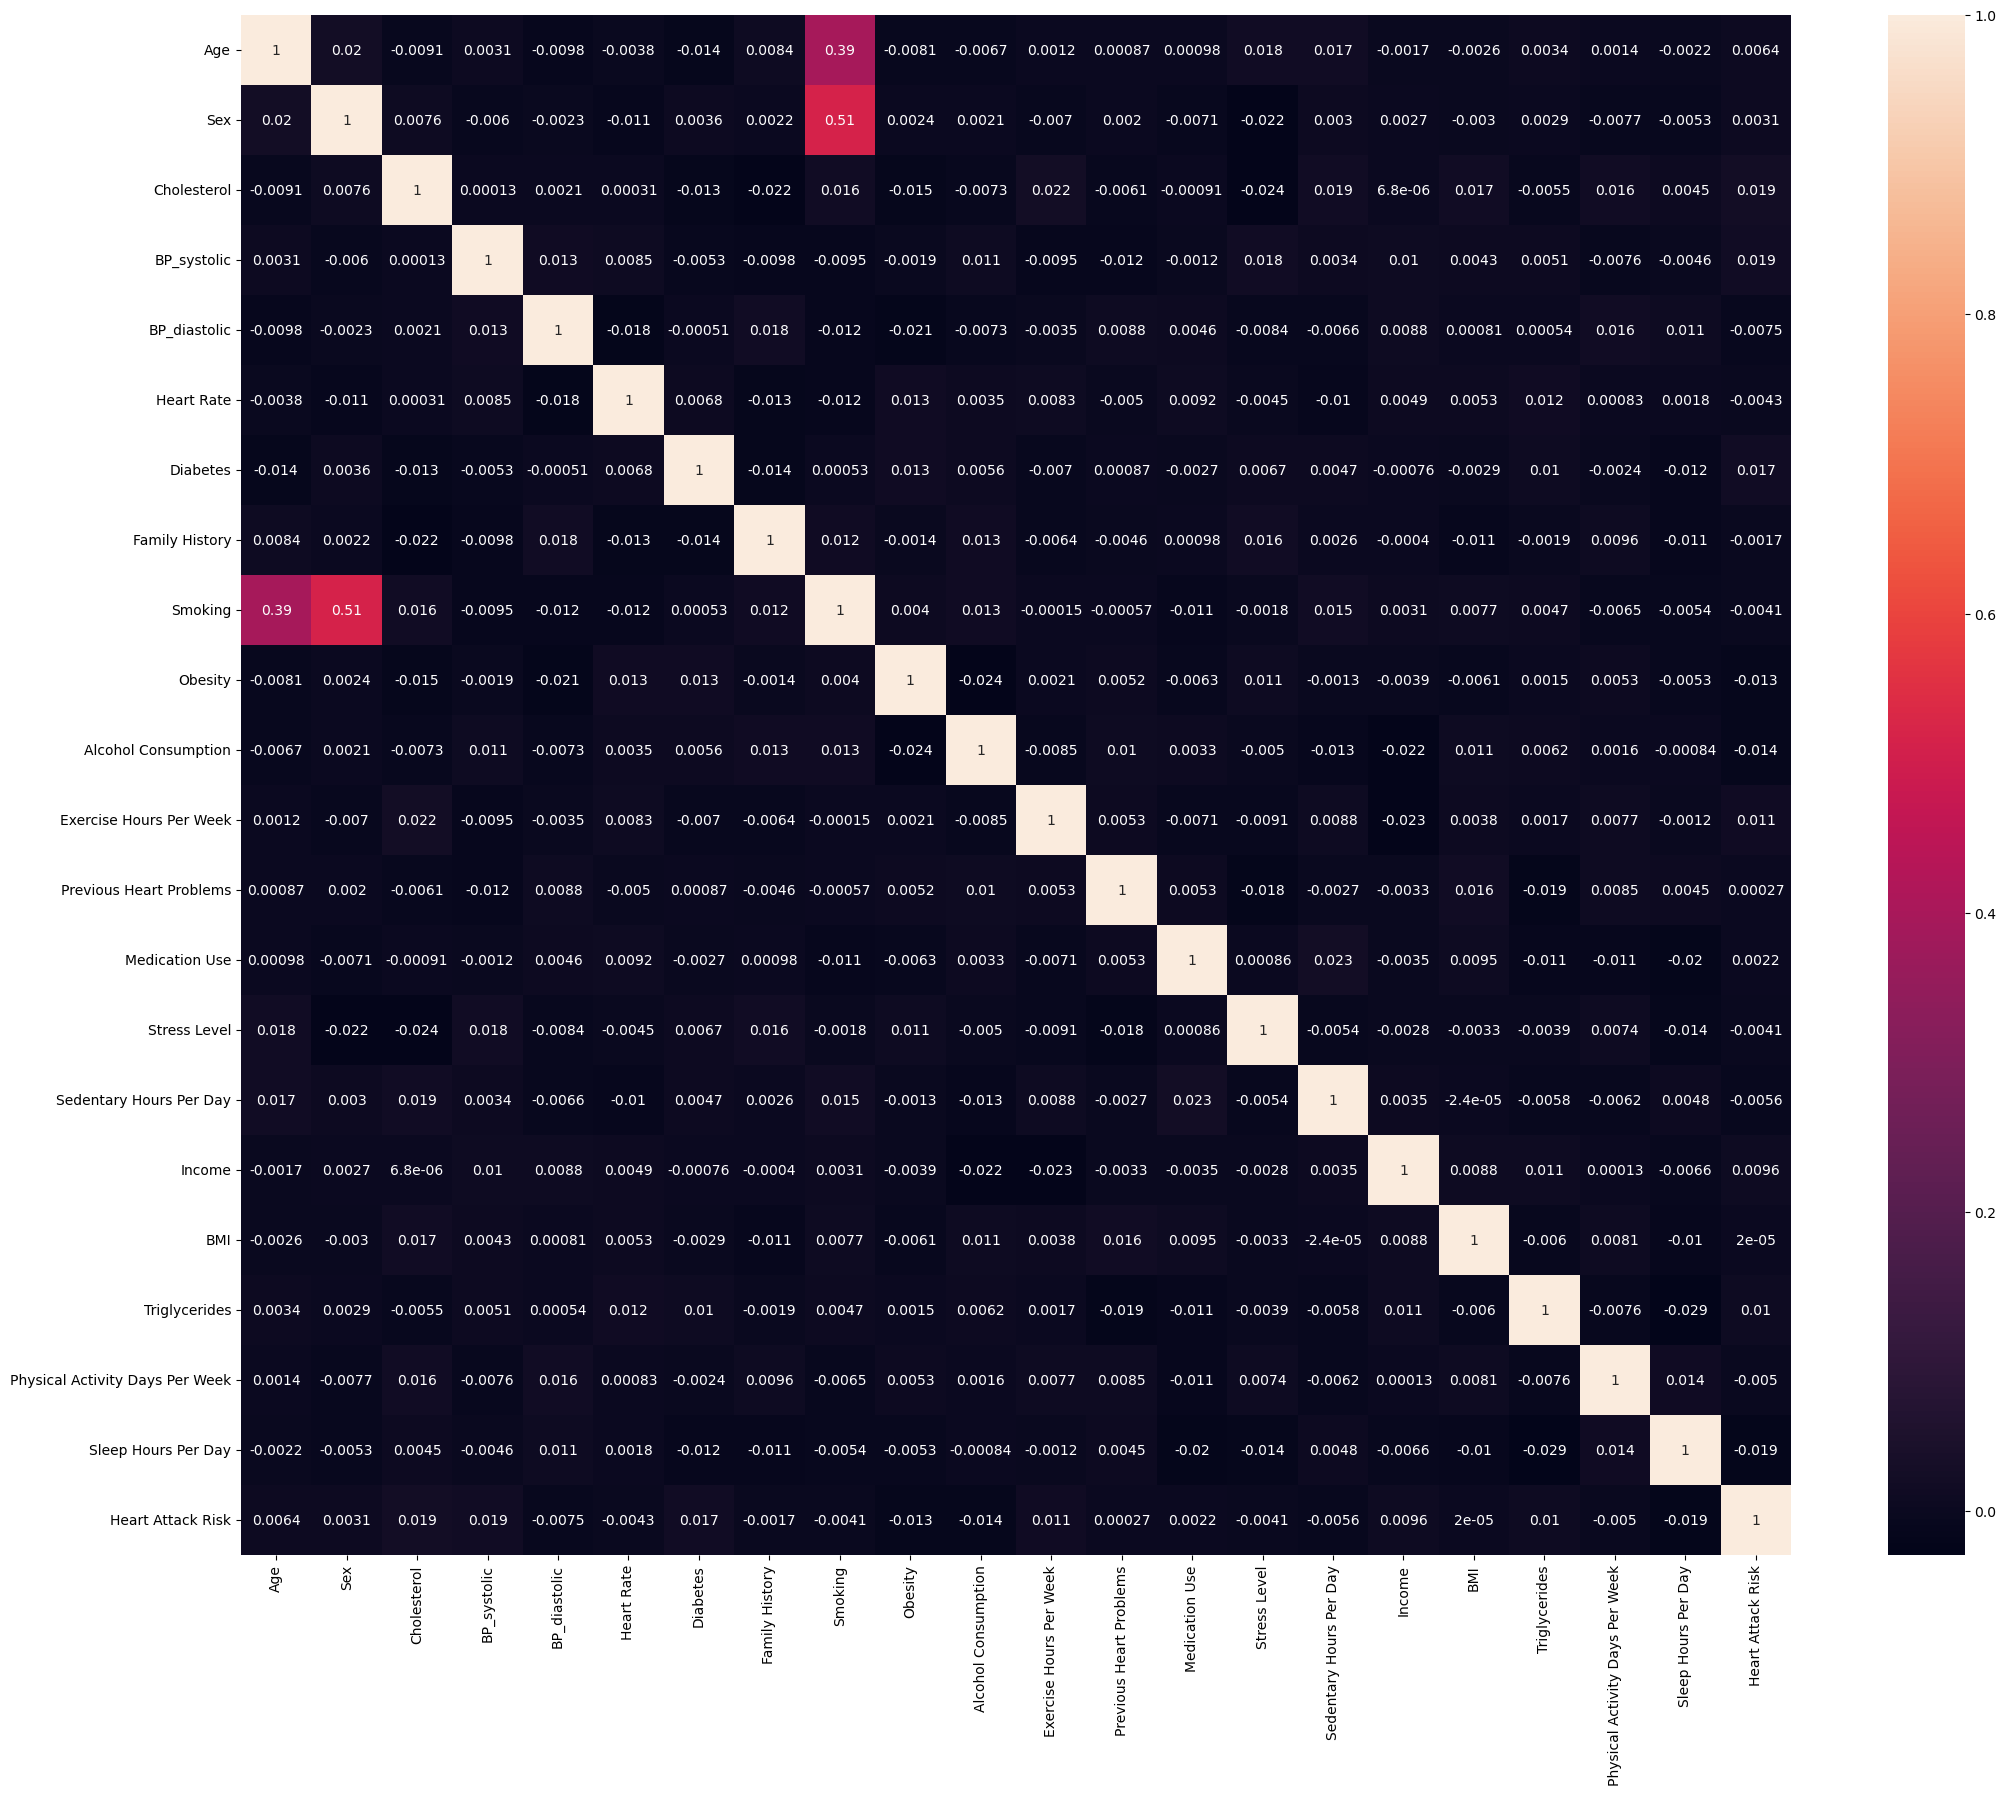

In [17]:
# check the relation of columns with target data
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
# Copied the first dataframe if required we can use
df2 = df.copy()

# Drop the column Country and Continent
df2.drop('Country', axis=1, inplace=True)
df2.drop('Continent', axis=1, inplace=True)
df2.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,72,0,0,1,0,...,0,9,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0
1,21,1,389,165,93,98,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0
2,21,0,324,174,99,72,1,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0
3,84,1,383,163,100,73,1,1,1,0,...,0,9,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0
4,66,1,318,91,88,93,1,1,1,1,...,0,6,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0


In [23]:
df2['Diet'].value_counts()

Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

In [25]:
df2['Hemisphere'].value_counts()

Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Hemisphere, dtype: int64

In [26]:
# We required lable encoding of two columns Diat and Hemisphere.(Convert to ordinal data)

columns_to_encode = ['Diet','Hemisphere']

df_encoded = pd.get_dummies(df2, columns=columns_to_encode, prefix=columns_to_encode)


In [27]:
df_encoded

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67,1,208,158,88,72,0,0,1,0,...,31.251233,286,0,6,0,1,0,0,0,1
1,21,1,389,165,93,98,1,1,1,1,...,27.194973,235,1,7,0,0,0,1,1,0
2,21,0,324,174,99,72,1,0,0,0,...,28.176571,587,4,4,0,0,1,0,1,0
3,84,1,383,163,100,73,1,1,1,0,...,36.464704,378,3,4,0,1,0,0,1,0
4,66,1,318,91,88,93,1,1,1,1,...,21.809144,231,1,5,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94,76,61,1,1,1,0,...,19.655895,67,7,7,0,0,1,0,1,0
8759,28,0,120,157,102,73,1,0,0,1,...,23.993866,617,4,9,0,0,1,0,1,0
8760,47,1,250,161,75,105,0,1,1,1,...,35.406146,527,4,4,1,1,0,0,0,1
8761,36,1,178,119,67,60,1,0,1,0,...,27.294020,114,2,8,0,0,0,1,0,1


In [14]:
df_encoded.columns

Index(['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere'],
      dtype='object')

In [30]:
# Give the Column indexing and noe our working dataframe is df_new.

df_new = df_encoded[['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy','Hemisphere_Northern Hemisphere',
         'Hemisphere_Southern Hemisphere', 'Heart Attack Risk']]
df_new.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Heart Attack Risk
0,67,1,208,158,88,72,0,0,1,0,...,31.251233,286,0,6,1,0,0,0,1,0
1,21,1,389,165,93,98,1,1,1,1,...,27.194973,235,1,7,0,0,1,1,0,0
2,21,0,324,174,99,72,1,0,0,0,...,28.176571,587,4,4,0,1,0,1,0,0
3,84,1,383,163,100,73,1,1,1,0,...,36.464704,378,3,4,1,0,0,1,0,0
4,66,1,318,91,88,93,1,1,1,1,...,21.809144,231,1,5,0,0,1,1,0,0


In [31]:
# Check the datatypes of each column.
df_new.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Diet_Average                         uint8
Diet_Healthy                         uint8
Diet_Unheal

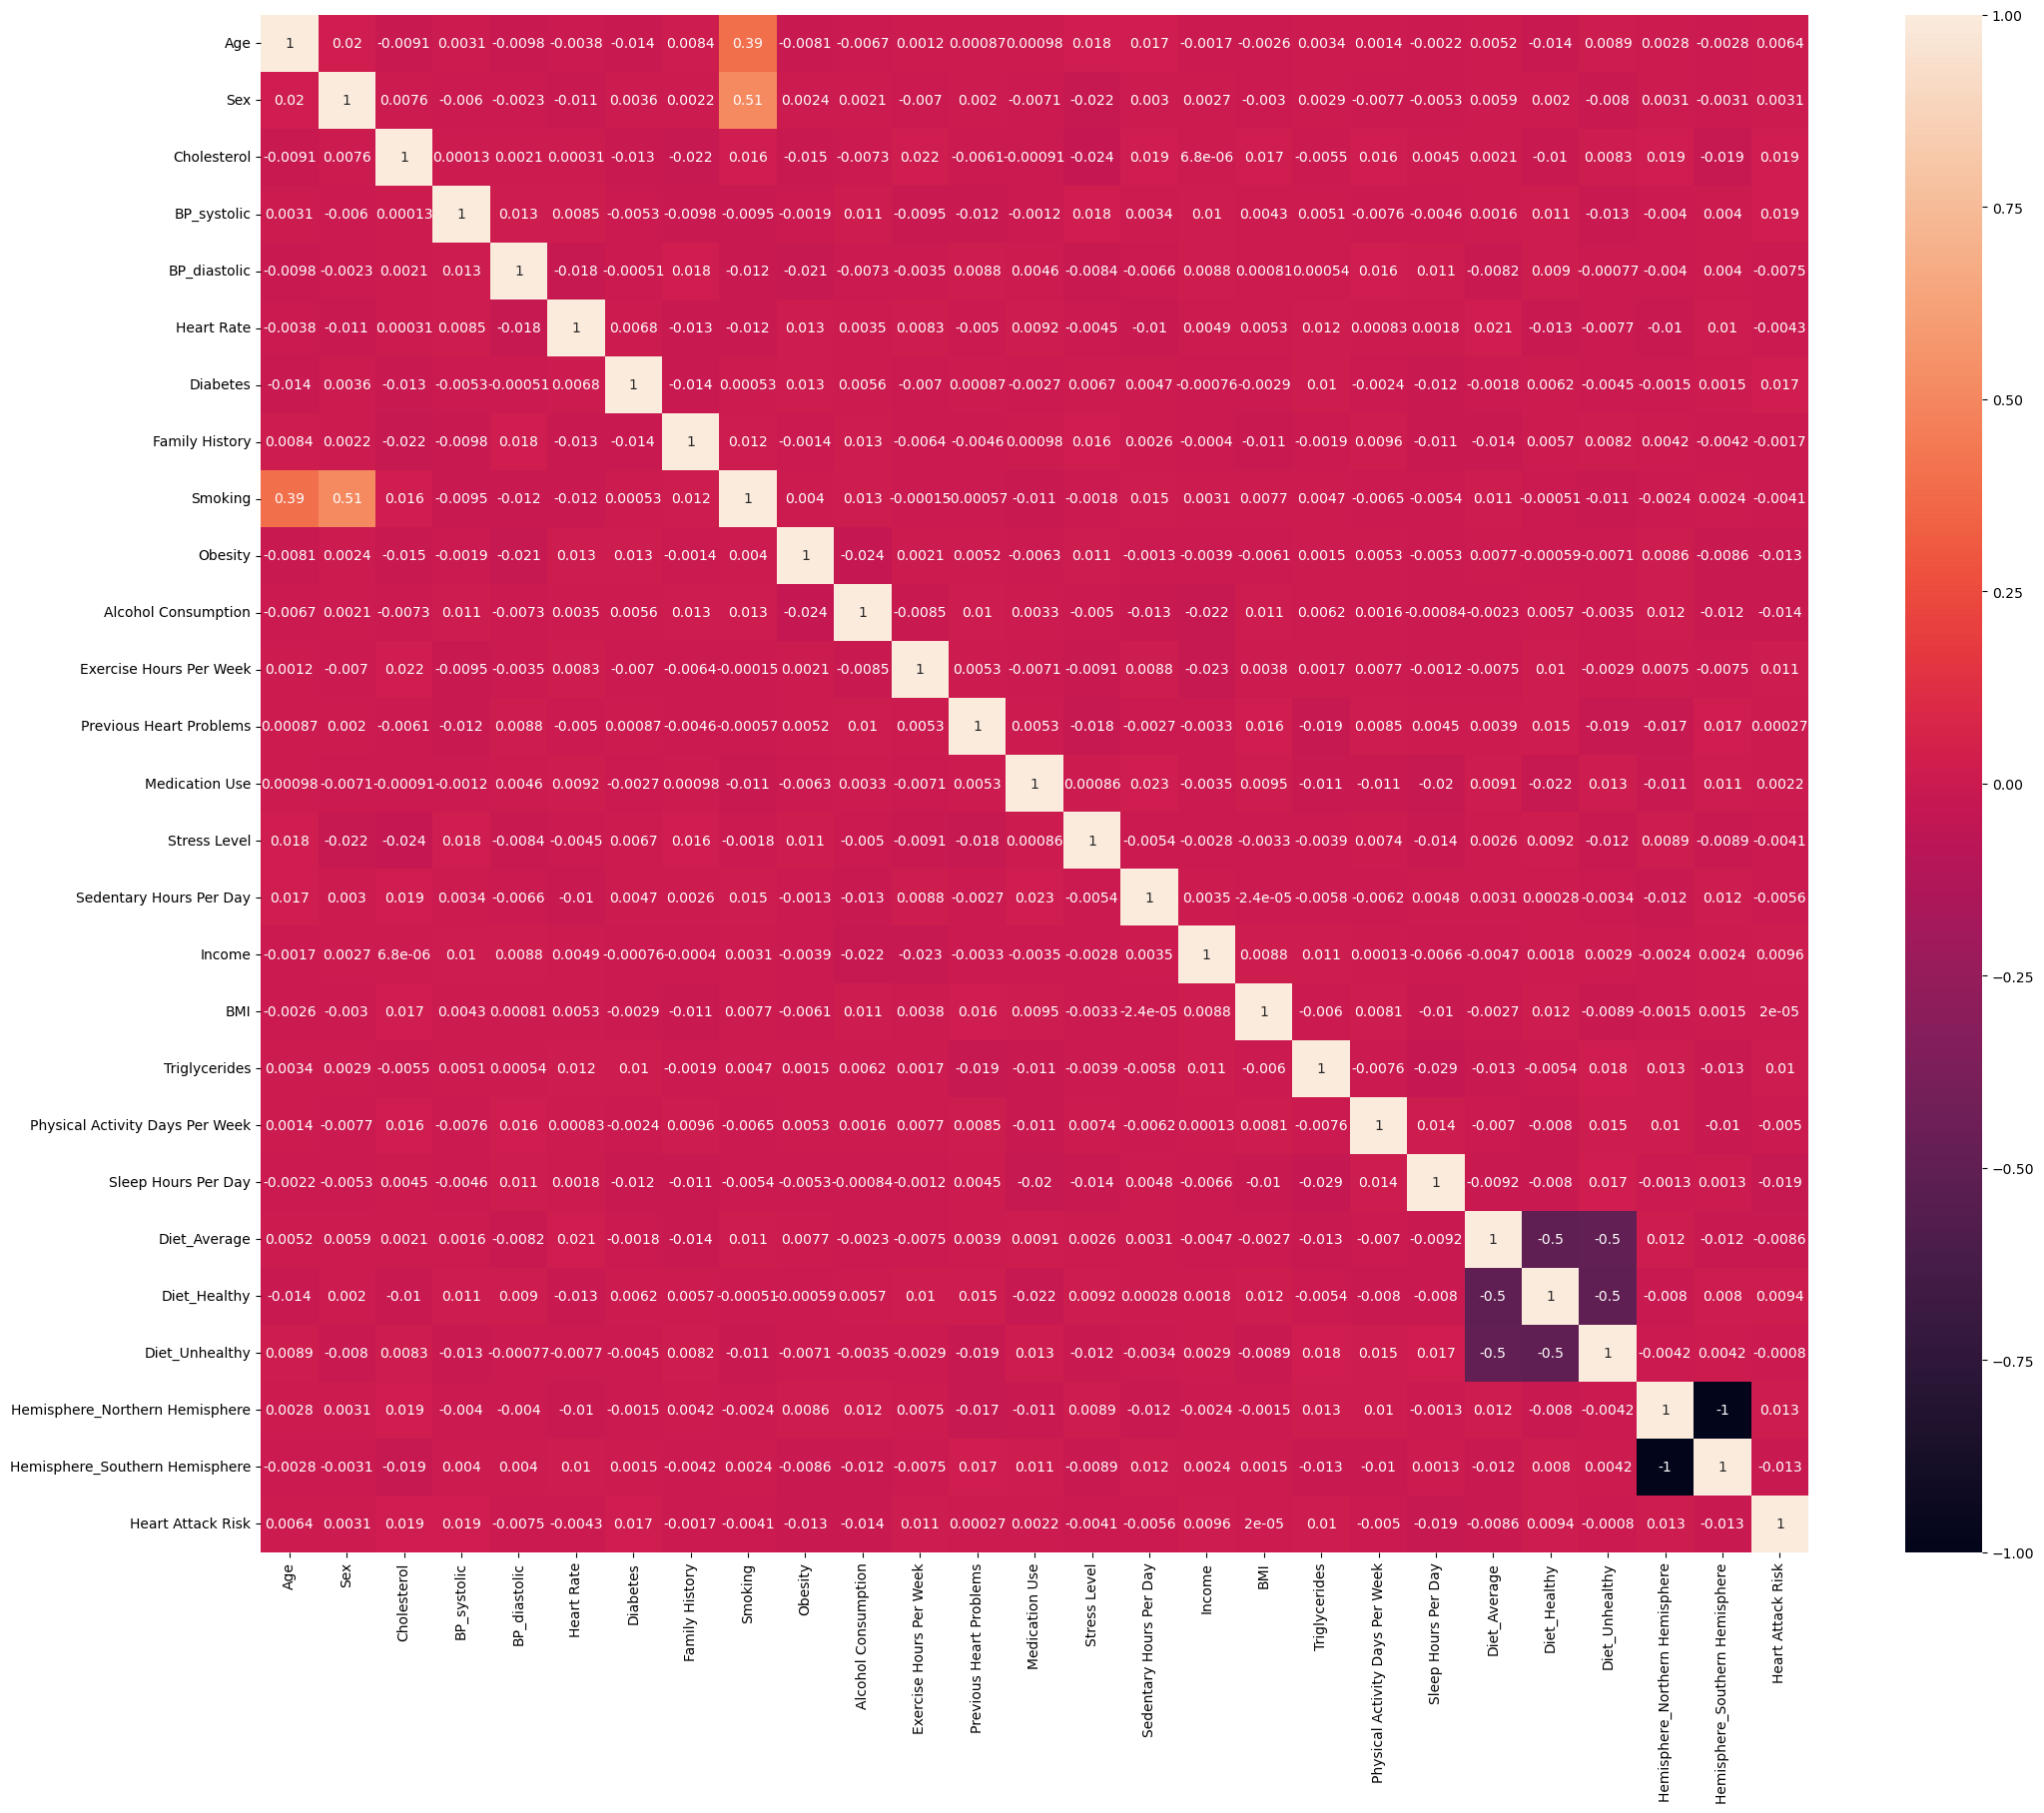

In [32]:
# check the relation of columns with target data
plt.figure(figsize=(25, 20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

2. Exploratory Data Analysis

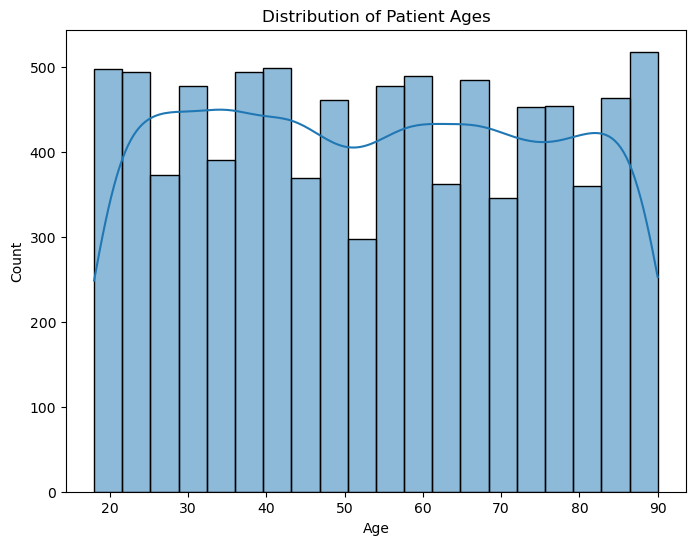

In [22]:
# 2.1 Column wise distributions of Data

plt.figure(figsize=(8, 6))
sns.histplot(data=df_new, x='Age', bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
x = df_new.groupby('Heart Attack Risk').count().index
x

Int64Index([0, 1], dtype='int64', name='Heart Attack Risk')

In [25]:
y = df_new.groupby('Heart Attack Risk')['Age'].count()
y

Heart Attack Risk
0    5624
1    3139
Name: Age, dtype: int64

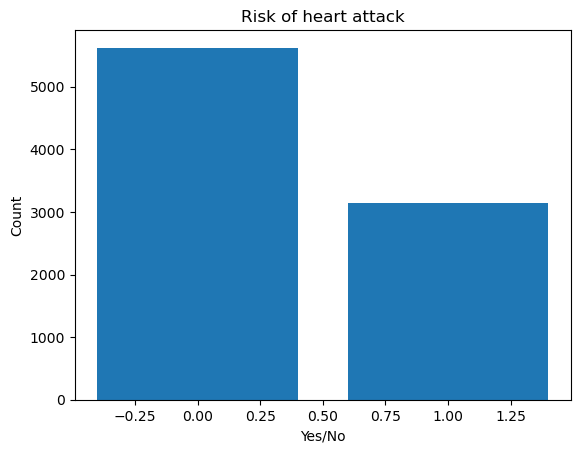

In [30]:
plt.bar(x, y)
plt.title('Risk of heart attack')
plt.xlabel('Yes/No')
plt.ylabel('Count')
plt.show()

In [26]:
df_new['Sex'].value_counts()

1    6111
0    2652
Name: Sex, dtype: int64

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

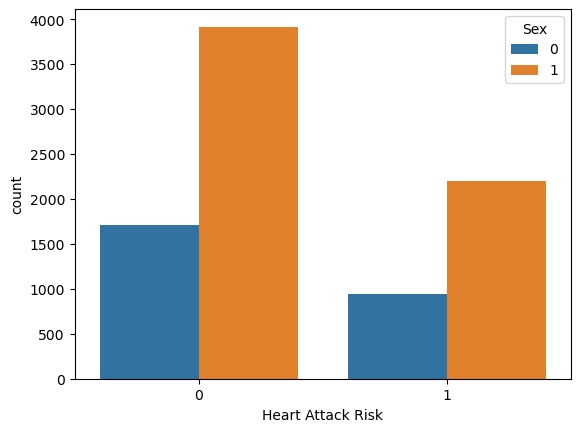

In [38]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Sex')

C:\Users\RaThoD\AppData\Local\Temp\ipykernel_9152\644129826.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Cholesterol'])


<Axes: xlabel='Cholesterol', ylabel='Density'>

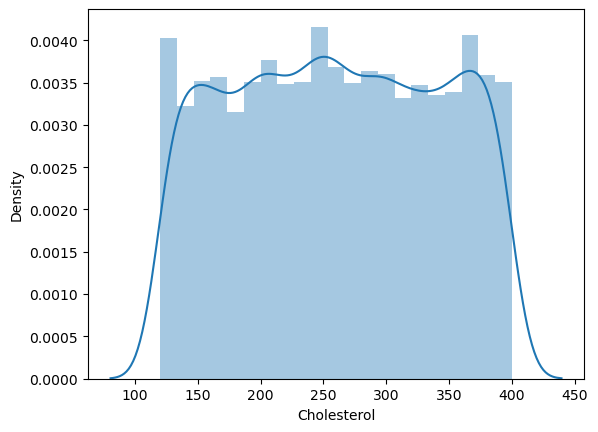

In [43]:
sns.distplot(df_new['Cholesterol'])

In [42]:
# The data of Cholesterol is very close to 0, we can say symentric data.
df_new['Cholesterol'].skew()

-0.0009547396917188247

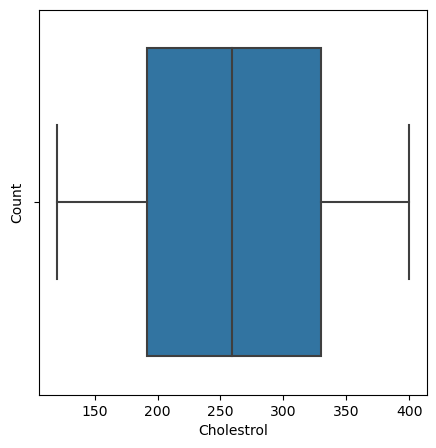

In [45]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_encoded, x='Cholesterol')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

C:\Users\RaThoD\AppData\Local\Temp\ipykernel_9152\3271446024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['BP_systolic'])


<Axes: xlabel='BP_systolic', ylabel='Density'>

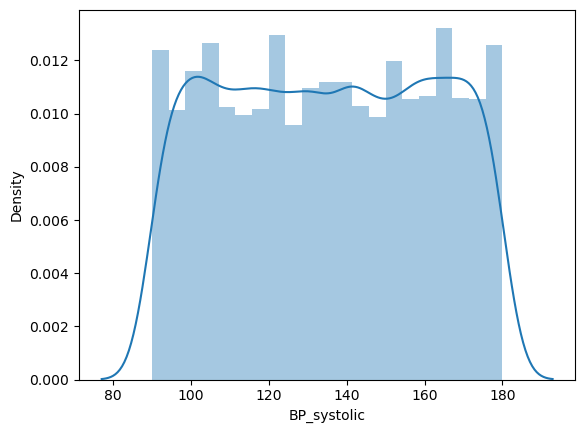

In [46]:
sns.distplot(df_new['BP_systolic'])

In [47]:
# The data of BP_systolic is very close to 0, we can say symentric data.
df_new['BP_systolic'].skew()

-0.002661218396212451

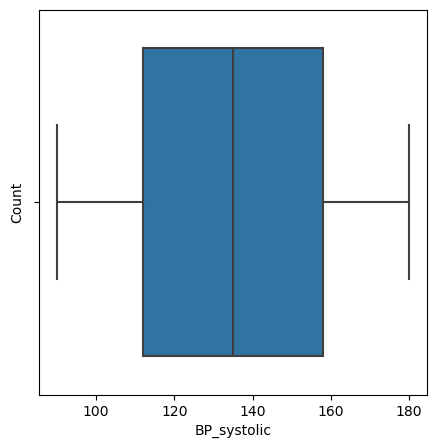

In [48]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_new, x='BP_systolic')
plt.xlabel('BP_systolic')
plt.ylabel('Count')
plt.show()

C:\Users\RaThoD\AppData\Local\Temp\ipykernel_9152\3454525187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['BP_diastolic'])


<Axes: xlabel='BP_diastolic', ylabel='Density'>

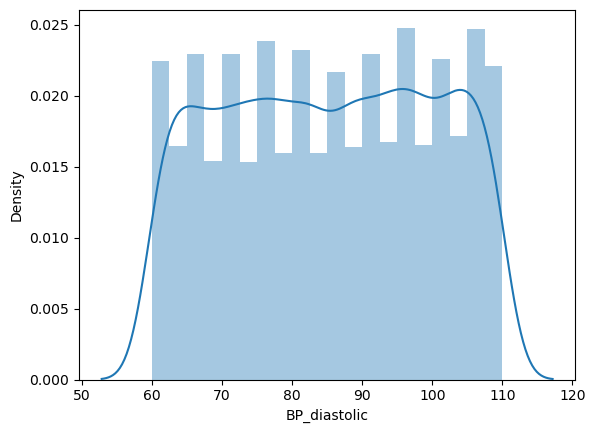

In [49]:
sns.distplot(df_new['BP_diastolic'])

In [50]:
df_new['BP_diastolic'].skew()

-0.023374840776208872

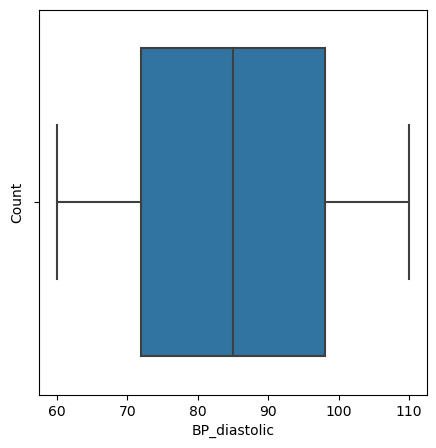

In [44]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_new, x='BP_diastolic')
plt.xlabel('BP_diastolic')
plt.ylabel('Count')
plt.show()

In [39]:
df_new['Diabetes'].value_counts()

1    5716
0    3047
Name: Diabetes, dtype: int64

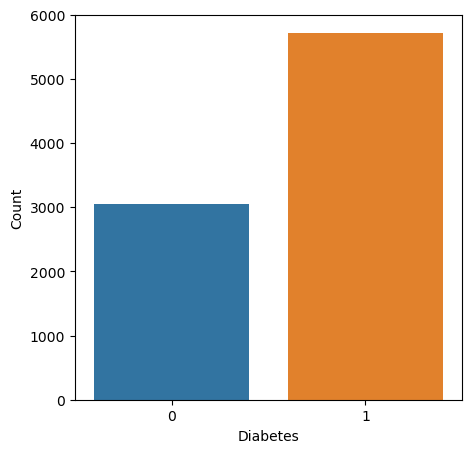

In [52]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

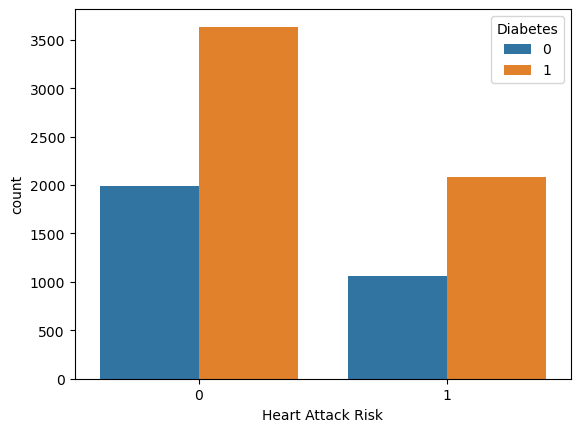

In [51]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Diabetes')

In [41]:
df_new['Family History'].value_counts()

0    4443
1    4320
Name: Family History, dtype: int64

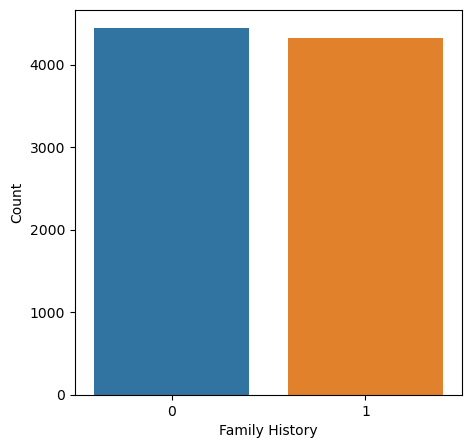

In [42]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

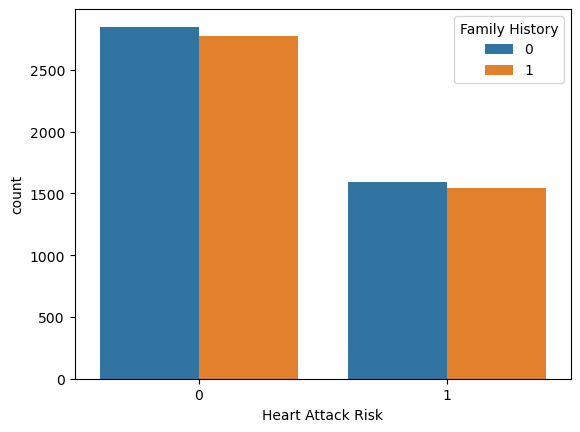

In [53]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Family History')

In [45]:
df_new['Smoking'].value_counts()

1    7859
0     904
Name: Smoking, dtype: int64

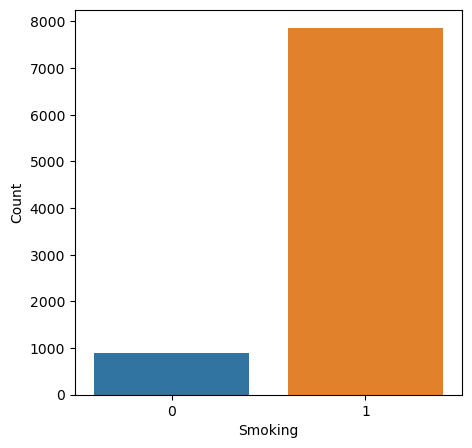

In [46]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

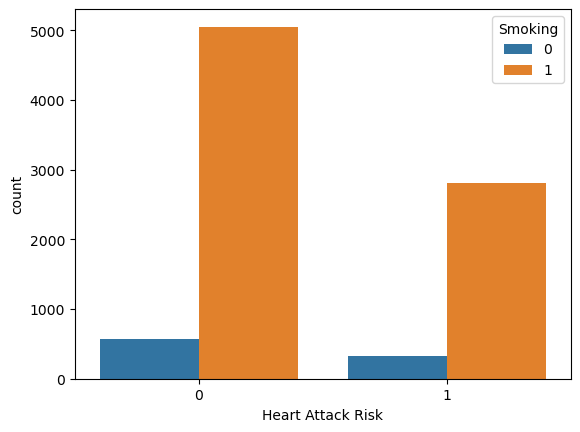

In [54]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Smoking')

In [47]:
df_new['Obesity'].value_counts()

1    4394
0    4369
Name: Obesity, dtype: int64

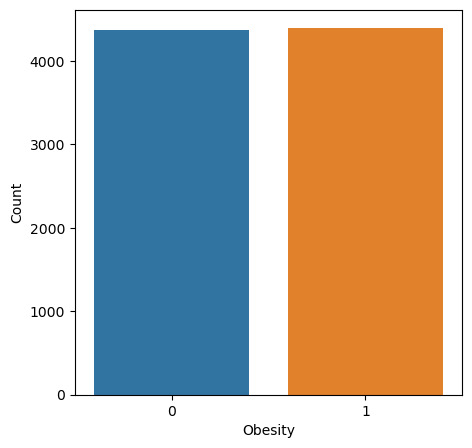

In [49]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

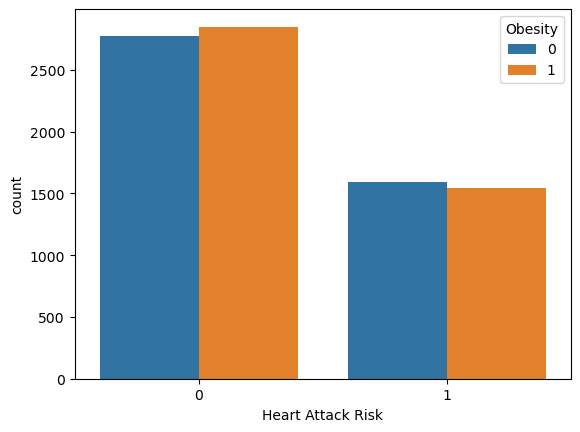

In [55]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Obesity')

In [50]:
df_new['Alcohol Consumption'].value_counts()

1    5241
0    3522
Name: Alcohol Consumption, dtype: int64

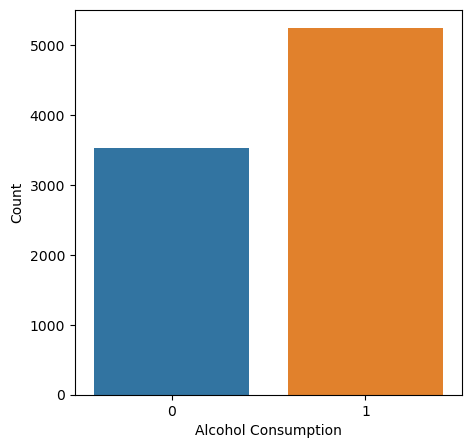

In [51]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

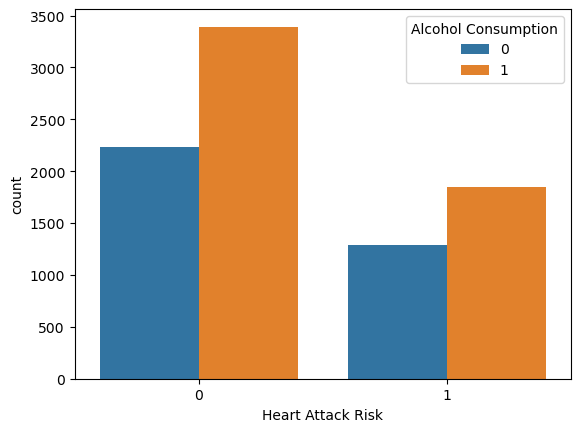

In [56]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Alcohol Consumption')

In [52]:
df_new['Previous Heart Problems'].value_counts()

0    4418
1    4345
Name: Previous Heart Problems, dtype: int64

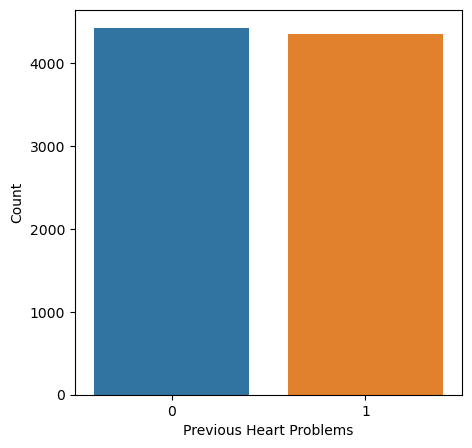

In [53]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Previous Heart Problems')
plt.xlabel('Previous Heart Problems')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

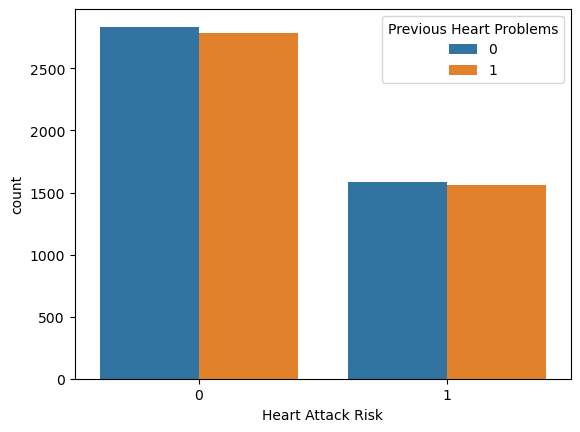

In [58]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Previous Heart Problems')

In [54]:
df_new['Medication Use'].value_counts()

0    4396
1    4367
Name: Medication Use, dtype: int64

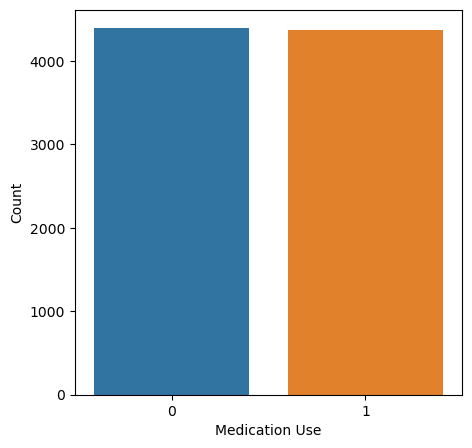

In [55]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Medication Use')
plt.xlabel('Medication Use')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

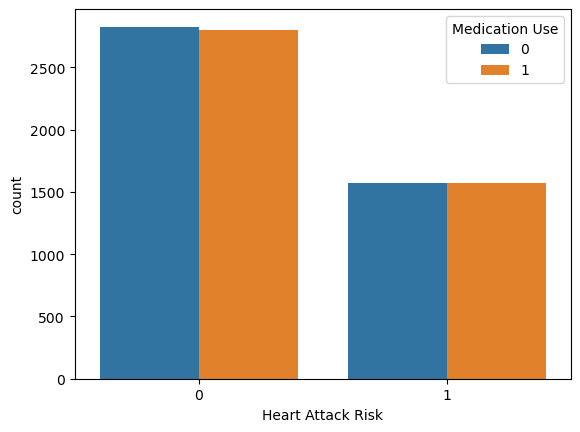

In [59]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Medication Use')

In [56]:
df_new['Stress Level'].value_counts()

2     913
4     910
7     903
9     887
8     879
3     868
1     865
5     860
6     855
10    823
Name: Stress Level, dtype: int64

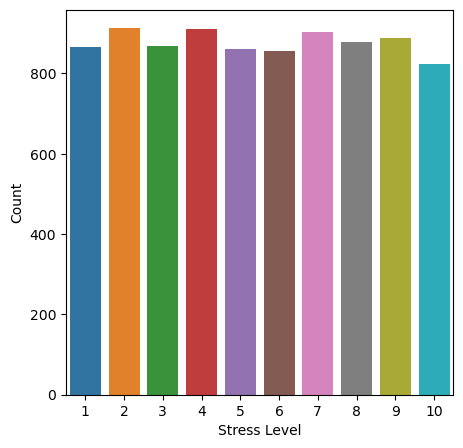

In [57]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

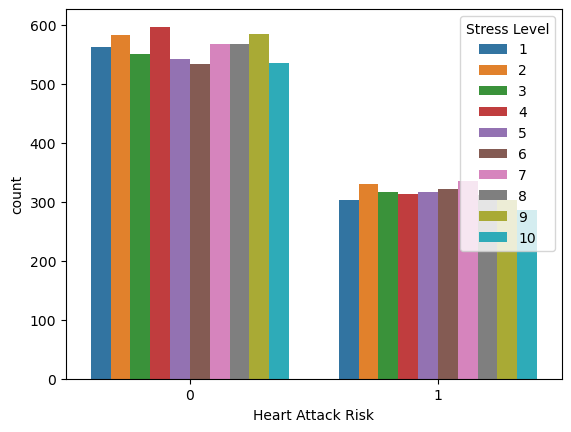

In [60]:
sns.countplot(x = 'Heart Attack Risk', data=df_new,hue='Stress Level')

C:\Users\RaThoD\AppData\Local\Temp\ipykernel_9152\3765834658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Stress Level'])


<Axes: xlabel='Stress Level', ylabel='Density'>

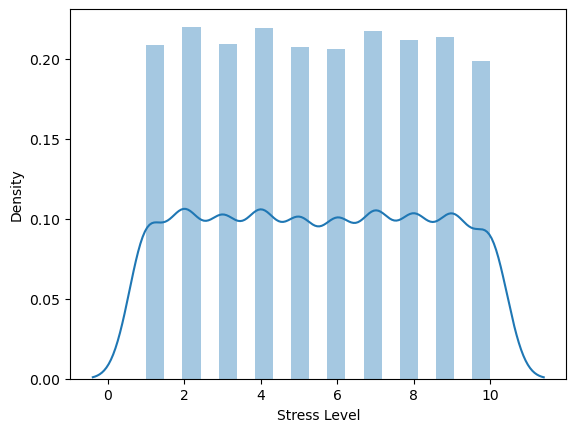

In [61]:
sns.distplot(df_new['Stress Level'])

In [64]:
df_new['Stress Level'].skew()

0.00838895813855685

In [58]:
df_new['Physical Activity Days Per Week'].value_counts()

3    1143
1    1121
2    1109
7    1095
5    1079
4    1077
6    1074
0    1065
Name: Physical Activity Days Per Week, dtype: int64

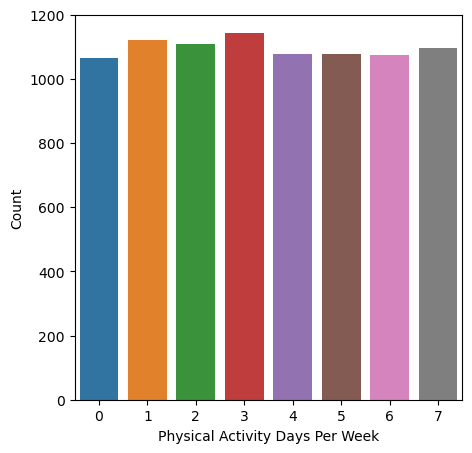

In [59]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Count')
plt.show()

In [60]:
df_new['Sleep Hours Per Day'].value_counts()

10    1293
8     1288
6     1276
7     1270
5     1263
9     1192
4     1181
Name: Sleep Hours Per Day, dtype: int64

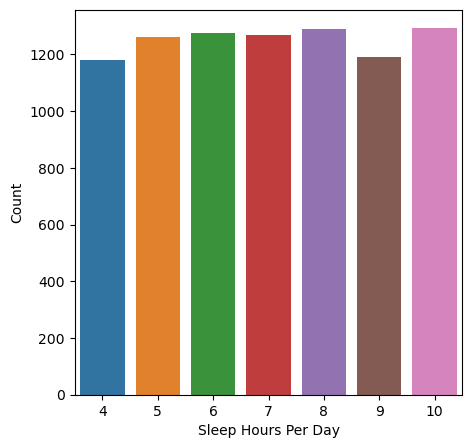

In [61]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Count')
plt.show()

In [62]:
df_new['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

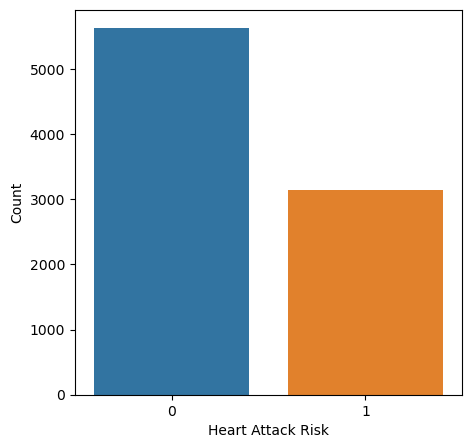

In [63]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_new, x='Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.show()

In [65]:
df['Hemisphere'].value_counts()

Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Hemisphere, dtype: int64

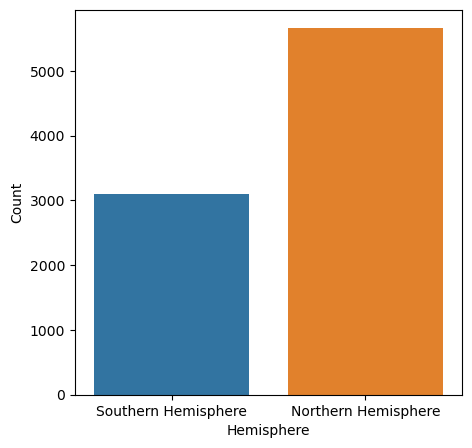

In [65]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df2, x='Hemisphere')
plt.xlabel('Hemisphere')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

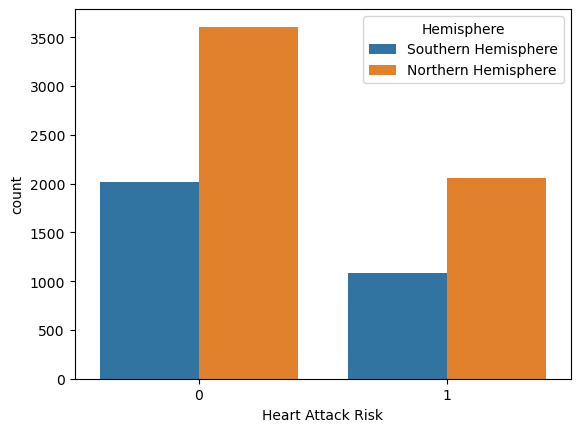

In [67]:
sns.countplot(x = 'Heart Attack Risk', data=df,hue='Hemisphere')

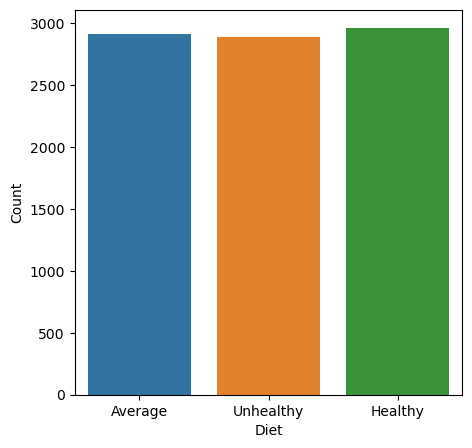

In [67]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df2, x='Diet')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

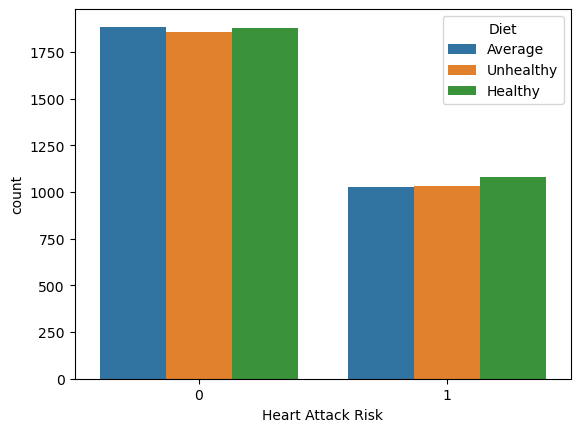

In [68]:
sns.countplot(x = 'Heart Attack Risk', data=df,hue='Diet')

In [62]:
# To check data are symentric or not symentric.
# as we can say all feature are near by 0, so we can say data are almost symentric
skewness = df_new.skew()
skewness

Age                                0.028498
Sex                               -0.859374
Cholesterol                       -0.000955
BP_systolic                       -0.002661
BP_diastolic                      -0.023375
Heart Rate                        -0.003227
Diabetes                          -0.639647
Family History                     0.028080
Smoking                           -2.609778
Obesity                           -0.005707
Alcohol Consumption               -0.400174
Exercise Hours Per Week           -0.016387
Previous Heart Problems            0.016664
Medication Use                     0.006620
Stress Level                       0.008389
Sedentary Hours Per Day            0.017974
Income                             0.021792
BMI                                0.035996
Triglycerides                     -0.001915
Physical Activity Days Per Week    0.017822
Sleep Hours Per Day                0.000357
Diet_Average                       0.712136
Diet_Healthy                    

In [68]:
df_new.describe()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,135.075659,85.156111,75.021682,0.652288,0.492982,0.896839,0.501426,...,28.891446,417.677051,3.489672,7.023508,0.332306,0.337784,0.329910,0.645898,0.354102,0.358211
std,21.249509,0.459425,80.863276,26.349976,14.676565,20.550948,0.476271,0.499979,0.304186,0.500026,...,6.319181,223.748137,2.282687,1.988473,0.471067,0.472981,0.470207,0.478268,0.478268,0.479502
min,18.000000,0.000000,120.000000,90.000000,60.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,192.000000,112.000000,72.000000,57.000000,0.000000,0.000000,1.000000,0.000000,...,23.422985,225.500000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,259.000000,135.000000,85.000000,75.000000,1.000000,0.000000,1.000000,1.000000,...,28.768999,417.000000,3.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.000000,1.000000,330.000000,158.000000,98.000000,93.000000,1.000000,1.000000,1.000000,1.000000,...,34.324594,612.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,400.000000,180.000000,110.000000,110.000000,1.000000,1.000000,1.000000,1.000000,...,39.997211,800.000000,7.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df_new.columns

Index(['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [71]:
X = df_new[['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere']]
y = df_new[['Heart Attack Risk']]

In [118]:
# Independent Data
X

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67,1,208,158,88,72,0,0,1,0,...,261404,31.251233,286,0,6,1,0,0,0,1
1,21,1,389,165,93,98,1,1,1,1,...,285768,27.194973,235,1,7,0,0,1,1,0
2,21,0,324,174,99,72,1,0,0,0,...,235282,28.176571,587,4,4,0,1,0,1,0
3,84,1,383,163,100,73,1,1,1,0,...,125640,36.464704,378,3,4,1,0,0,1,0
4,66,1,318,91,88,93,1,1,1,1,...,160555,21.809144,231,1,5,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94,76,61,1,1,1,0,...,235420,19.655895,67,7,7,0,1,0,1,0
8759,28,0,120,157,102,73,1,0,0,1,...,217881,23.993866,617,4,9,0,1,0,1,0
8760,47,1,250,161,75,105,0,1,1,1,...,36998,35.406146,527,4,4,1,0,0,0,1
8761,36,1,178,119,67,60,1,0,1,0,...,209943,27.294020,114,2,8,0,0,1,0,1


In [119]:
# Dependent data
y

,Heart Attack Risk
0,0
1,0
2,0
3,0
4,0
...,...
8758,0
8759,0
8760,1
8761,0


In [120]:
import xgboost

In [121]:
# To identyfy feature importance
xg = xgboost.XGBClassifier()

In [122]:
xg.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
xg.feature_importances_

array([0.03991709, 0.03914127, 0.03947032, 0.04289353, 0.03904292,
       0.03973879, 0.03945969, 0.03722866, 0.04114167, 0.03648821,
       0.04257109, 0.04004634, 0.04001634, 0.03693194, 0.0427756 ,
       0.04106021, 0.04029423, 0.04161778, 0.04261852, 0.03890283,
       0.04252512, 0.03943252, 0.03807065, 0.04403884, 0.03457595,
       0.        ], dtype=float32)

In [124]:
X.columns

Index(['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere'],
      dtype='object')

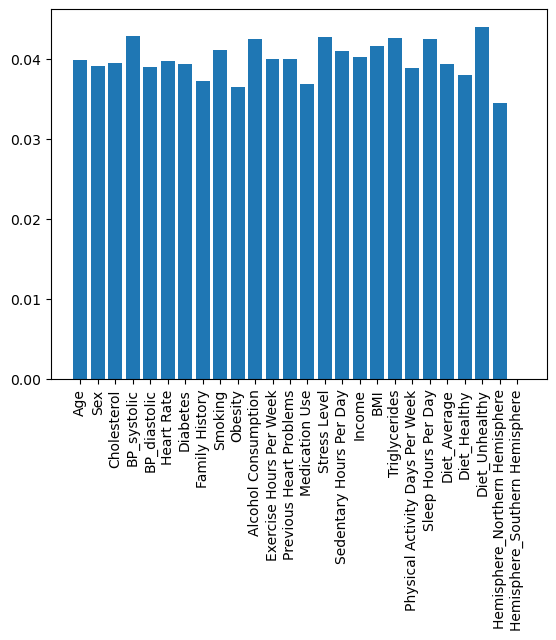

In [125]:
plt.bar(X.columns,xg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [84]:
df_new.describe()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,135.075659,85.156111,75.021682,0.652288,0.492982,0.896839,0.501426,...,28.891446,417.677051,3.489672,7.023508,0.332306,0.337784,0.329910,0.645898,0.354102,0.358211
std,21.249509,0.459425,80.863276,26.349976,14.676565,20.550948,0.476271,0.499979,0.304186,0.500026,...,6.319181,223.748137,2.282687,1.988473,0.471067,0.472981,0.470207,0.478268,0.478268,0.479502
min,18.000000,0.000000,120.000000,90.000000,60.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,192.000000,112.000000,72.000000,57.000000,0.000000,0.000000,1.000000,0.000000,...,23.422985,225.500000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,259.000000,135.000000,85.000000,75.000000,1.000000,0.000000,1.000000,1.000000,...,28.768999,417.000000,3.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.000000,1.000000,330.000000,158.000000,98.000000,93.000000,1.000000,1.000000,1.000000,1.000000,...,34.324594,612.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,400.000000,180.000000,110.000000,110.000000,1.000000,1.000000,1.000000,1.000000,...,39.997211,800.000000,7.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
# Transform the data using minMax Scaler

from sklearn.preprocessing import MinMaxScaler

In [127]:
mn = MinMaxScaler()

In [128]:
X_new = mn.fit_transform(X)

In [129]:
X_new.shape

(8763, 26)

In [130]:
y

,Heart Attack Risk
0,0
1,0
2,0
3,0
4,0
...,...
8758,0
8759,0
8760,1
8761,0


In [131]:
X_new

array([[0.68055556, 1.        , 0.31428571, ..., 0.        , 0.        ,
        1.        ],
       [0.04166667, 1.        , 0.96071429, ..., 1.        , 1.        ,
        0.        ],
       [0.04166667, 0.        , 0.72857143, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.40277778, 1.        , 0.46428571, ..., 0.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.20714286, ..., 1.        , 0.        ,
        1.        ],
       [0.09722222, 0.        , 0.84285714, ..., 0.        , 1.        ,
        0.        ]])

In [132]:
# Splitthe data in to Train(70%) and Test(30%)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3)

In [133]:
X_train

array([[0.31944444, 1.        , 0.71428571, ..., 1.        , 1.        ,
        0.        ],
       [0.86111111, 1.        , 0.02142857, ..., 0.        , 1.        ,
        0.        ],
       [0.18055556, 0.        , 0.46785714, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.80555556, 1.        , 0.73214286, ..., 1.        , 0.        ,
        1.        ],
       [0.05555556, 0.        , 0.08214286, ..., 0.        , 1.        ,
        0.        ],
       [0.09722222, 1.        , 0.02142857, ..., 0.        , 1.        ,
        0.        ]])

In [134]:
y_train

,Heart Attack Risk
7868,0
6448,0
2912,1
3692,0
1562,1
...,...
6643,1
8526,0
859,1
1404,0


In [135]:
X_test

array([[0.81944444, 0.        , 0.96428571, ..., 0.        , 0.        ,
        1.        ],
       [0.15277778, 1.        , 0.67857143, ..., 1.        , 0.        ,
        1.        ],
       [0.70833333, 1.        , 0.64642857, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.90277778, 1.        , 0.25714286, ..., 1.        , 1.        ,
        0.        ],
       [0.20833333, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.08214286, ..., 0.        , 0.        ,
        1.        ]])

In [136]:
y_test

,Heart Attack Risk
7494,1
5895,1
6255,0
8194,1
495,0
...,...
7724,0
6133,0
3868,1
6598,0


In [137]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6134, 26)
(6134, 1)
(2629, 26)
(2629, 1)


In [138]:
#Logistic Regression Model to check the accuracy

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [139]:
y_predict = lr.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
y_test

,Heart Attack Risk
7494,1
5895,1
6255,0
8194,1
495,0
...,...
7724,0
6133,0
3868,1
6598,0


In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1687    0]
 [ 942    0]]


In [142]:
# We got the 64% accuracy of model.

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X_train,y_train,cv=5).mean())
print(cross_val_score(lr,X_test,y_test,cv=5).mean())

C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.6418324246062294
0.6378866558030055


C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [144]:
# We are going to check accuracy using KNeighborsClassifier (KNN Model)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23,metric='minkowski',weights='uniform')
knn.fit(X_train,y_train)

C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

In [145]:
y_Predict = knn.predict(X_test)
y_Predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
y_test

,Heart Attack Risk
7494,1
5895,1
6255,0
8194,1
495,0
...,...
7724,0
6133,0
3868,1
6598,0


In [147]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_Predict))

[[1592   95]
 [ 878   64]]


In [148]:
# We got the 62% accuracy.

from sklearn.metrics import classification_report
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       0.64      0.94      0.77      1687
           1       0.40      0.07      0.12       942

    accuracy                           0.63      2629
   macro avg       0.52      0.51      0.44      2629
weighted avg       0.56      0.63      0.53      2629



In [150]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train,y_train.values.ravel(),cv=5).mean()


0.6162078580481622

In [151]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_test,y_test.values.ravel(),cv=5).mean()

0.6162078580481622

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

xt = []  # List to store values of k
st = []  # List to store cross-validation scores

# Iterate over different values of k (number of neighbors)
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', metric='minkowski')
    
    # Convert DataFrame to NumPy array and use ravel()
    cross_val_mean_score = cross_val_score(knn, X_test, y_test.values.ravel(), cv=5).mean()
    
    # Append the results to the lists
    st.append(cross_val_mean_score)
    xt.append(k)


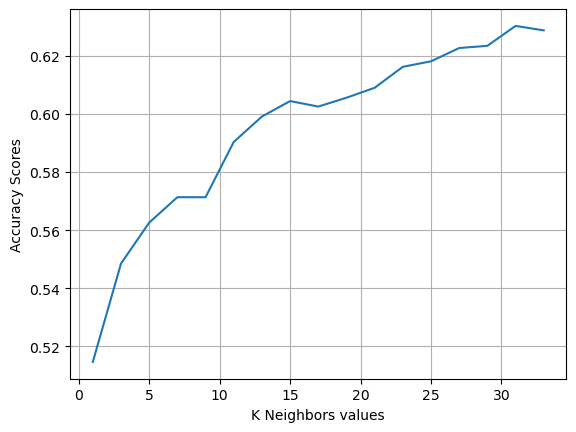

<Figure size 200x200 with 0 Axes>

In [153]:
plt.plot(xt,st)
plt.xlabel("K Neighbors values")
plt.ylabel("Accuracy Scores")
plt.grid()
plt.figure(figsize=(2,2))
plt.show()

In [154]:
x = []  # List to store values of k
score = []  # List to store cross-validation scores

# Iterate over different values of k (number of neighbors)
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', metric='minkowski')
    
    # Convert DataFrame to NumPy array and use ravel()
    cross_val_mean_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=5).mean()
    
    # Append the results to the lists
    x.append(cross_val_mean_score)
    score.append(k)

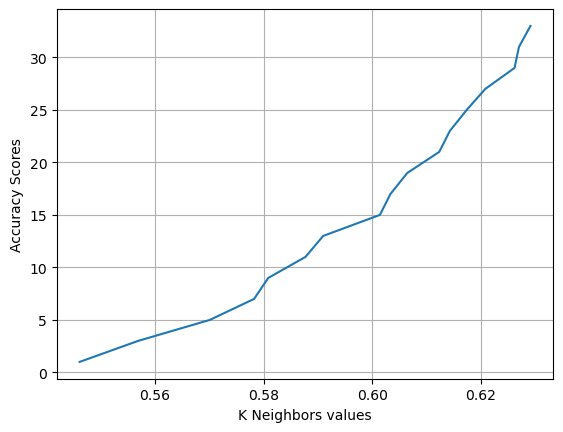

In [155]:
plt.plot(x,score)
plt.xlabel("K Neighbors values")
plt.ylabel("Accuracy Scores")
plt.grid()
plt.show()

In [156]:
# We are going to check the accuracy using DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
y_predict = dc.predict(X_test)

In [158]:
# We got the 53% accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1687
           1       0.35      0.36      0.36       942

    accuracy                           0.53      2629
   macro avg       0.49      0.49      0.49      2629
weighted avg       0.54      0.53      0.53      2629



In [159]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,X_train,y_train,cv=5).mean())
print(cross_val_score(dc,X_test,y_test,cv=5).mean())

0.5299962374576381
0.5420278833967046


[Text(0.19597763115608308, 0.9848484848484849, 'x[17] <= 0.066\ngini = 0.461\nsamples = 6134\nvalue = [3929, 2205]'),
 Text(0.032672571799425176, 0.9545454545454546, 'x[2] <= 0.041\ngini = 0.413\nsamples = 387\nvalue = [274, 113]'),
 Text(0.015119422038697162, 0.9242424242424242, 'x[20] <= 0.417\ngini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(0.013293680509495996, 0.8939393939393939, 'x[24] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.012380809744895412, 0.8636363636363636, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.014206551274096578, 0.8636363636363636, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.016945163567898328, 0.8939393939393939, 'x[11] <= 0.805\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.016032292803297744, 0.8636363636363636, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.017858034332498912, 0.8636363636363636, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05022572156015319, 0.9242424242424242, 'x[2] <= 0.798\ngini =

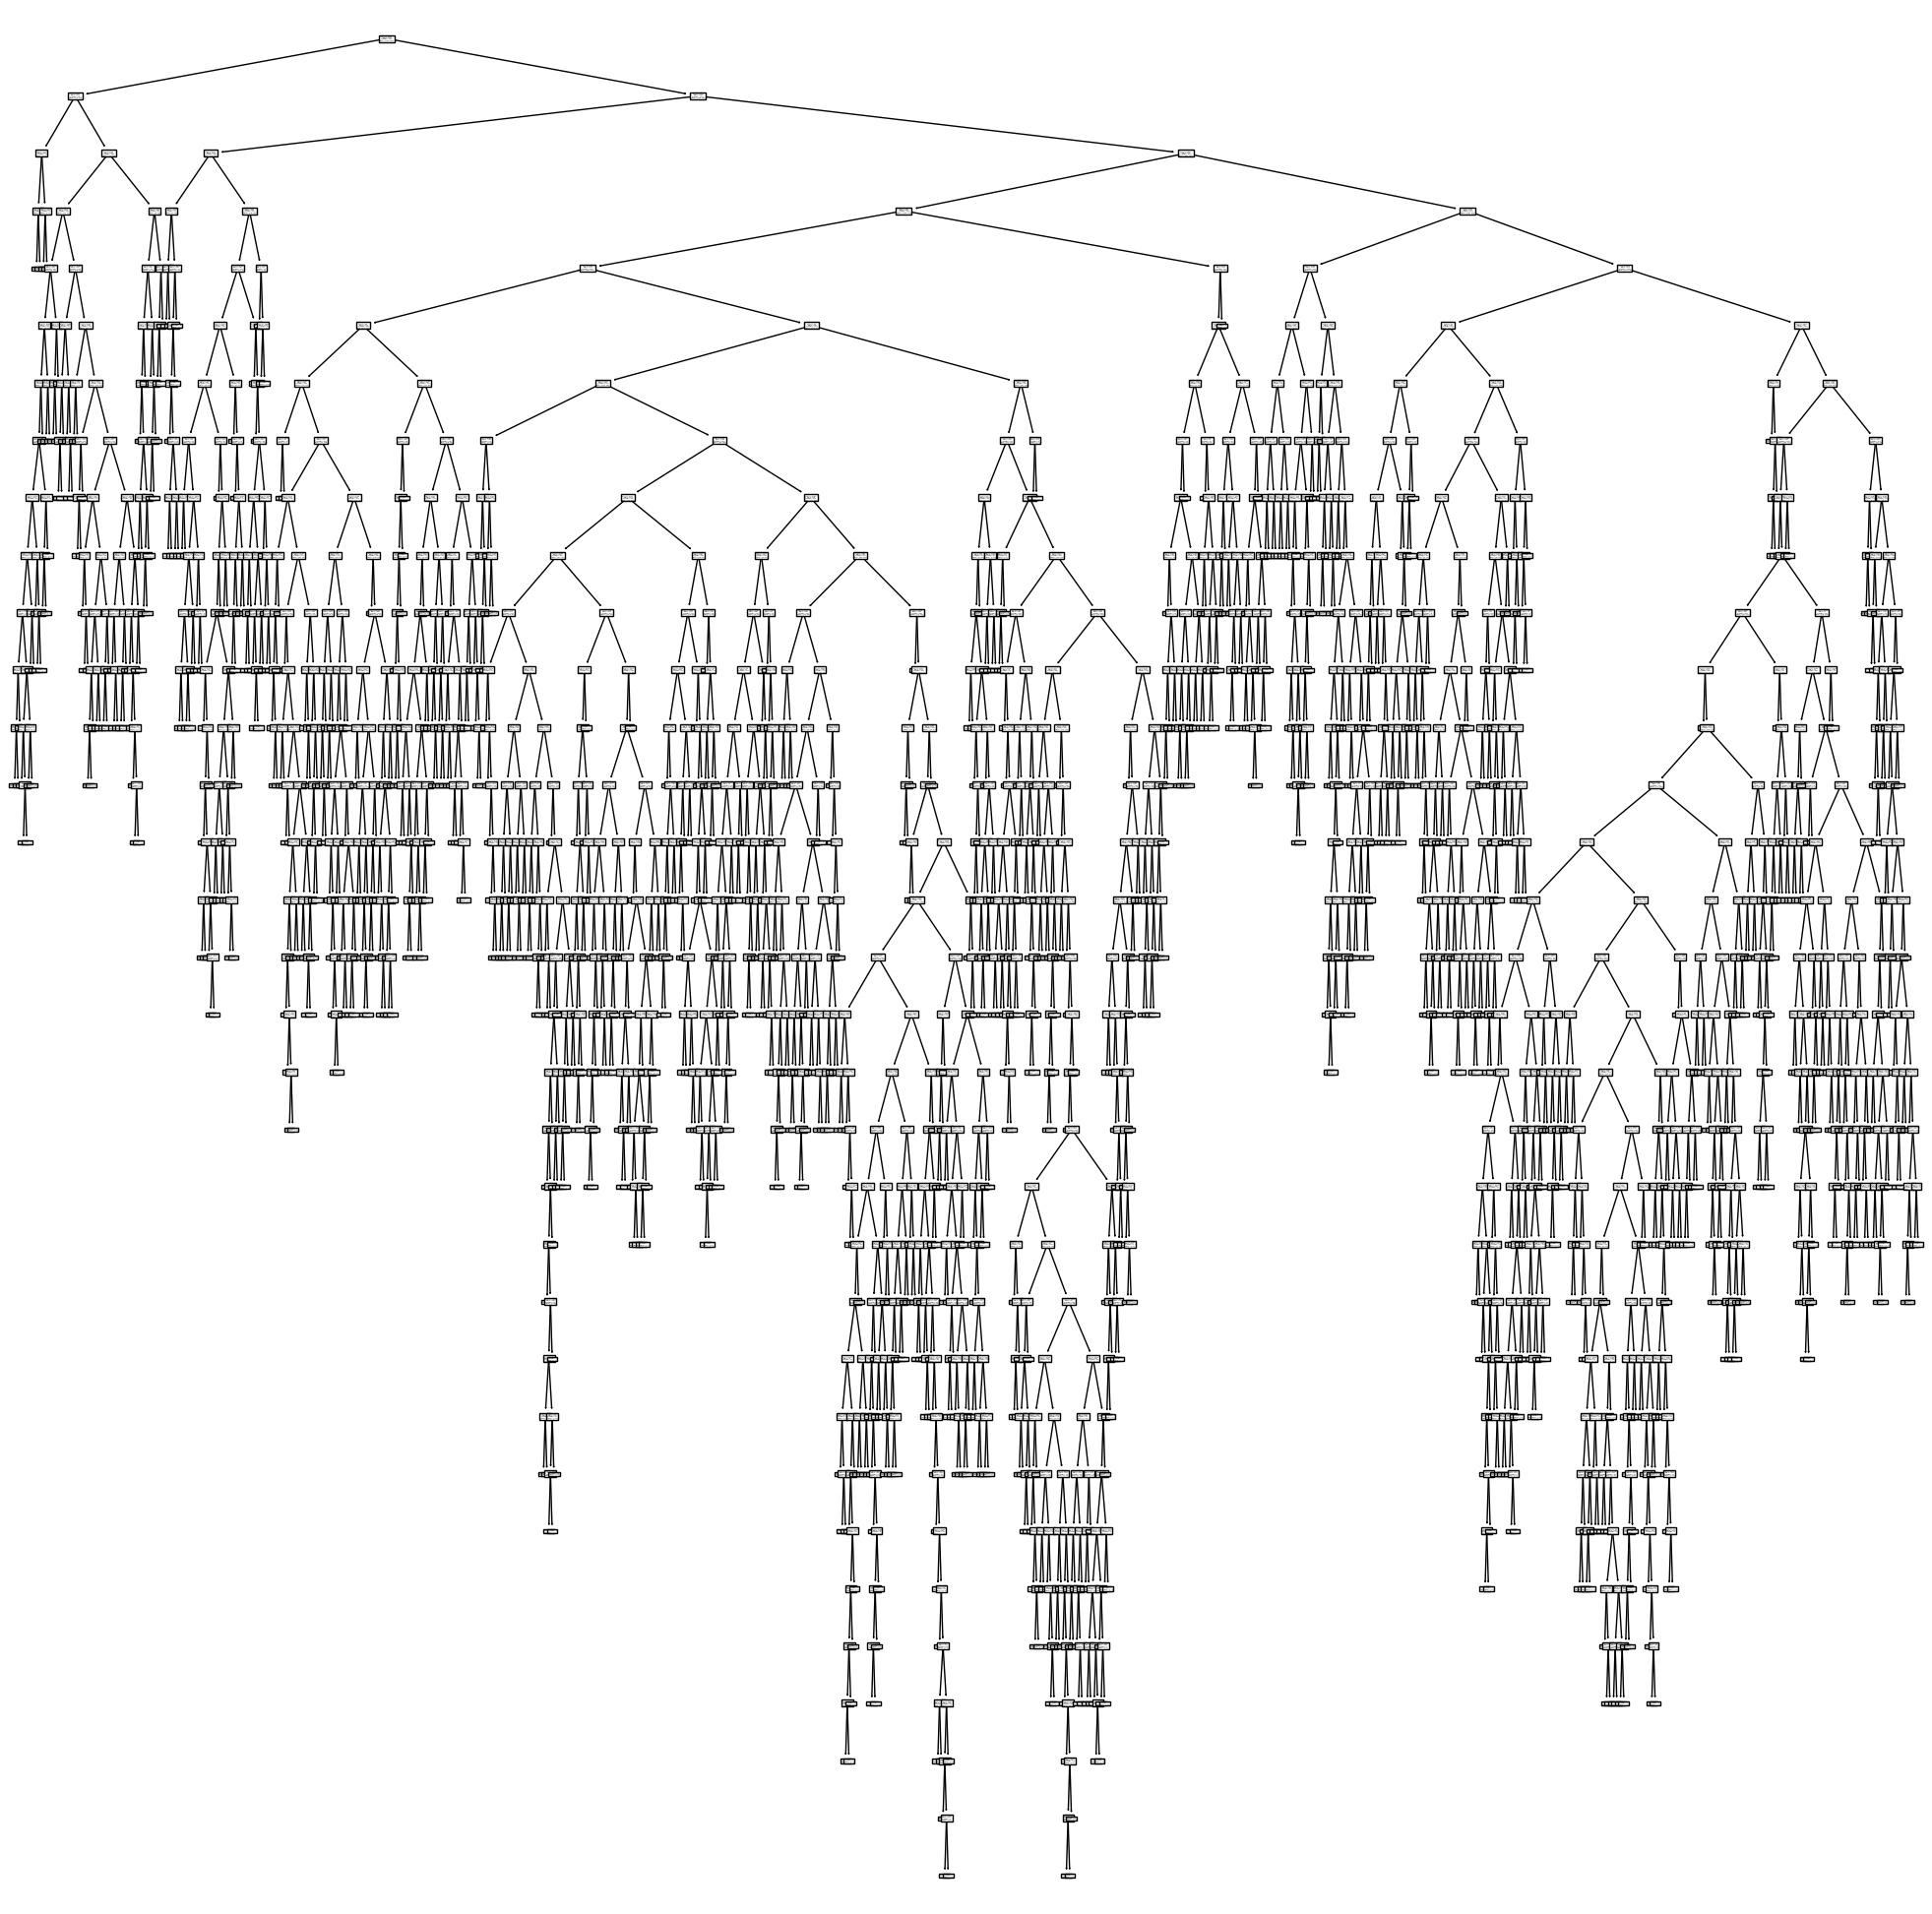

In [150]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(dc)

In [166]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Create and train the Bernoulli Naive Bayes model
bn = BernoulliNB()
bn.fit(X_train, y_train)




C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [167]:
# Make predictions on the test set
predictions = bn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
#print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
#print("\nClassification Report:")
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1148
           1       0.00      0.00      0.00       605

    accuracy                           0.65      1753
   macro avg       0.33      0.50      0.40      1753
weighted avg       0.43      0.65      0.52      1753



C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(bn,X_train,y_train,cv=5).mean())
print(cross_val_score(bn,X_test,y_test,cv=5).mean())

0.6385164051355207
0.6543068783068783


C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Standard Scaler

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
X_scaled

array([[ 0.62555713,  0.65876515, -0.64157889, ..., -0.70166695,
        -1.35057071,  1.35057071],
       [-1.53932232,  0.65876515,  1.59689495, ...,  1.42517757,
         0.74042772, -0.74042772],
       [-1.53932232, -1.51799165,  0.79302313, ..., -0.70166695,
         0.74042772, -0.74042772],
       ...,
       [-0.3156948 ,  0.65876515, -0.12215402, ..., -0.70166695,
        -1.35057071,  1.35057071],
       [-0.83338337,  0.65876515, -1.01259666, ...,  1.42517757,
        -1.35057071,  1.35057071],
       [-1.35107193, -1.51799165,  1.18877541, ..., -0.70166695,
         0.74042772, -0.74042772]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y, test_size=0.2)

In [76]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_predict = lr.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1119    0]
 [ 634    0]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1119
           1       0.00      0.00      0.00       634

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23,metric='minkowski',weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [83]:
y_Predict = knn.predict(X_test)
y_Predict


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_Predict))


[[1046   73]
 [ 594   40]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      1119
           1       0.35      0.06      0.11       634

    accuracy                           0.62      1753
   macro avg       0.50      0.50      0.43      1753
weighted avg       0.54      0.62      0.52      1753



In [89]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train,y_train,cv=5).mean()


0.6232524964336661

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_test,y_test,cv=5).mean()

0.624079772079772

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [94]:
xt = []  # List to store values of k
st = []  # List to store cross-validation scores

# Iterate over different values of k (number of neighbors)
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', metric='minkowski')
    
    # Convert DataFrame to NumPy array and use ravel()
    cross_val_mean_score = cross_val_score(knn, X_test, y_test, cv=5).mean()
    
    # Append the results to the lists
    st.append(cross_val_mean_score)
    xt.append(k)

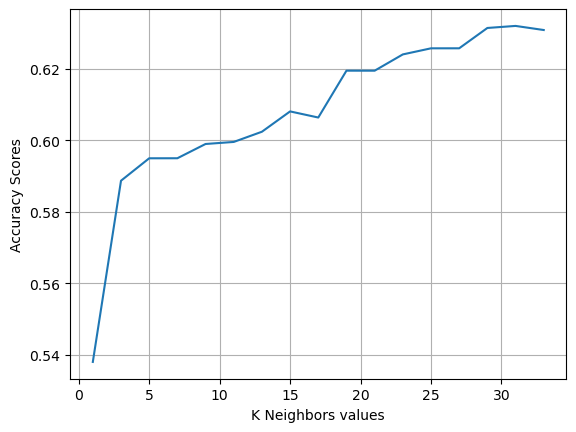

<Figure size 200x200 with 0 Axes>

In [95]:
plt.plot(xt,st)
plt.xlabel("K Neighbors values")
plt.ylabel("Accuracy Scores")
plt.grid()
plt.figure(figsize=(2,2))
plt.show()

In [96]:
x = []  # List to store values of k
score = []  # List to store cross-validation scores

# Iterate over different values of k (number of neighbors)
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', metric='minkowski')
    
    # Convert DataFrame to NumPy array and use ravel()
    cross_val_mean_score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    
    # Append the results to the lists
    x.append(cross_val_mean_score)
    score.append(k)


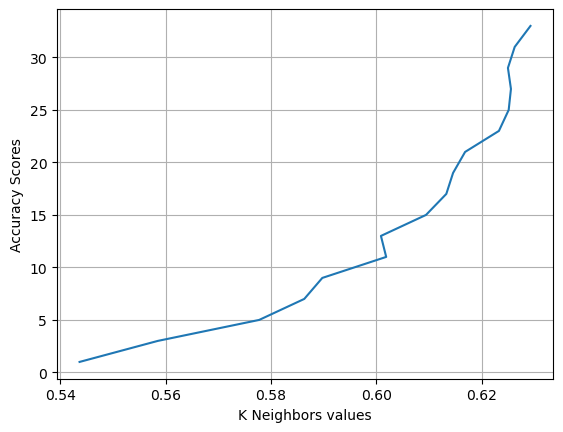

In [97]:
plt.plot(x,score)
plt.xlabel("K Neighbors values")
plt.ylabel("Accuracy Scores")
plt.grid()
plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
y_predict = dc.predict(X_test)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1119
           1       0.38      0.38      0.38       634

    accuracy                           0.55      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.55      0.55      1753



In [102]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,X_train,y_train,cv=5).mean())
print(cross_val_score(dc,X_test,y_test,cv=5).mean())

0.5400855920114123
0.5293479853479853


[Text(0.28375654663206695, 0.9838709677419355, 'x[3] <= -0.781\ngini = 0.459\nsamples = 7010\nvalue = [4505, 2505]'),
 Text(0.1285796182911196, 0.9516129032258065, 'x[0] <= -0.669\ngini = 0.442\nsamples = 1955\nvalue = [1310, 645]'),
 Text(0.024216797298009213, 0.9193548387096774, 'x[17] <= -0.938\ngini = 0.473\nsamples = 596\nvalue = [367, 229]'),
 Text(0.007820319954108302, 0.8870967741935484, 'x[15] <= 1.521\ngini = 0.411\nsamples = 142\nvalue = [101, 41]'),
 Text(0.006321815531764197, 0.8548387096774194, 'x[0] <= -0.81\ngini = 0.394\nsamples = 137\nvalue = [100, 37]'),
 Text(0.005572563320592143, 0.8225806451612904, 'x[5] <= -1.145\ngini = 0.425\nsamples = 121\nvalue = [84, 37]'),
 Text(0.0014985044223441058, 0.7903225806451613, 'x[17] <= -1.516\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.0007492522111720529, 0.7580645161290323, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.002247756633516159, 0.7580645161290323, 'x[17] <= -1.114\ngini = 0.355\nsamples = 13\nvalue

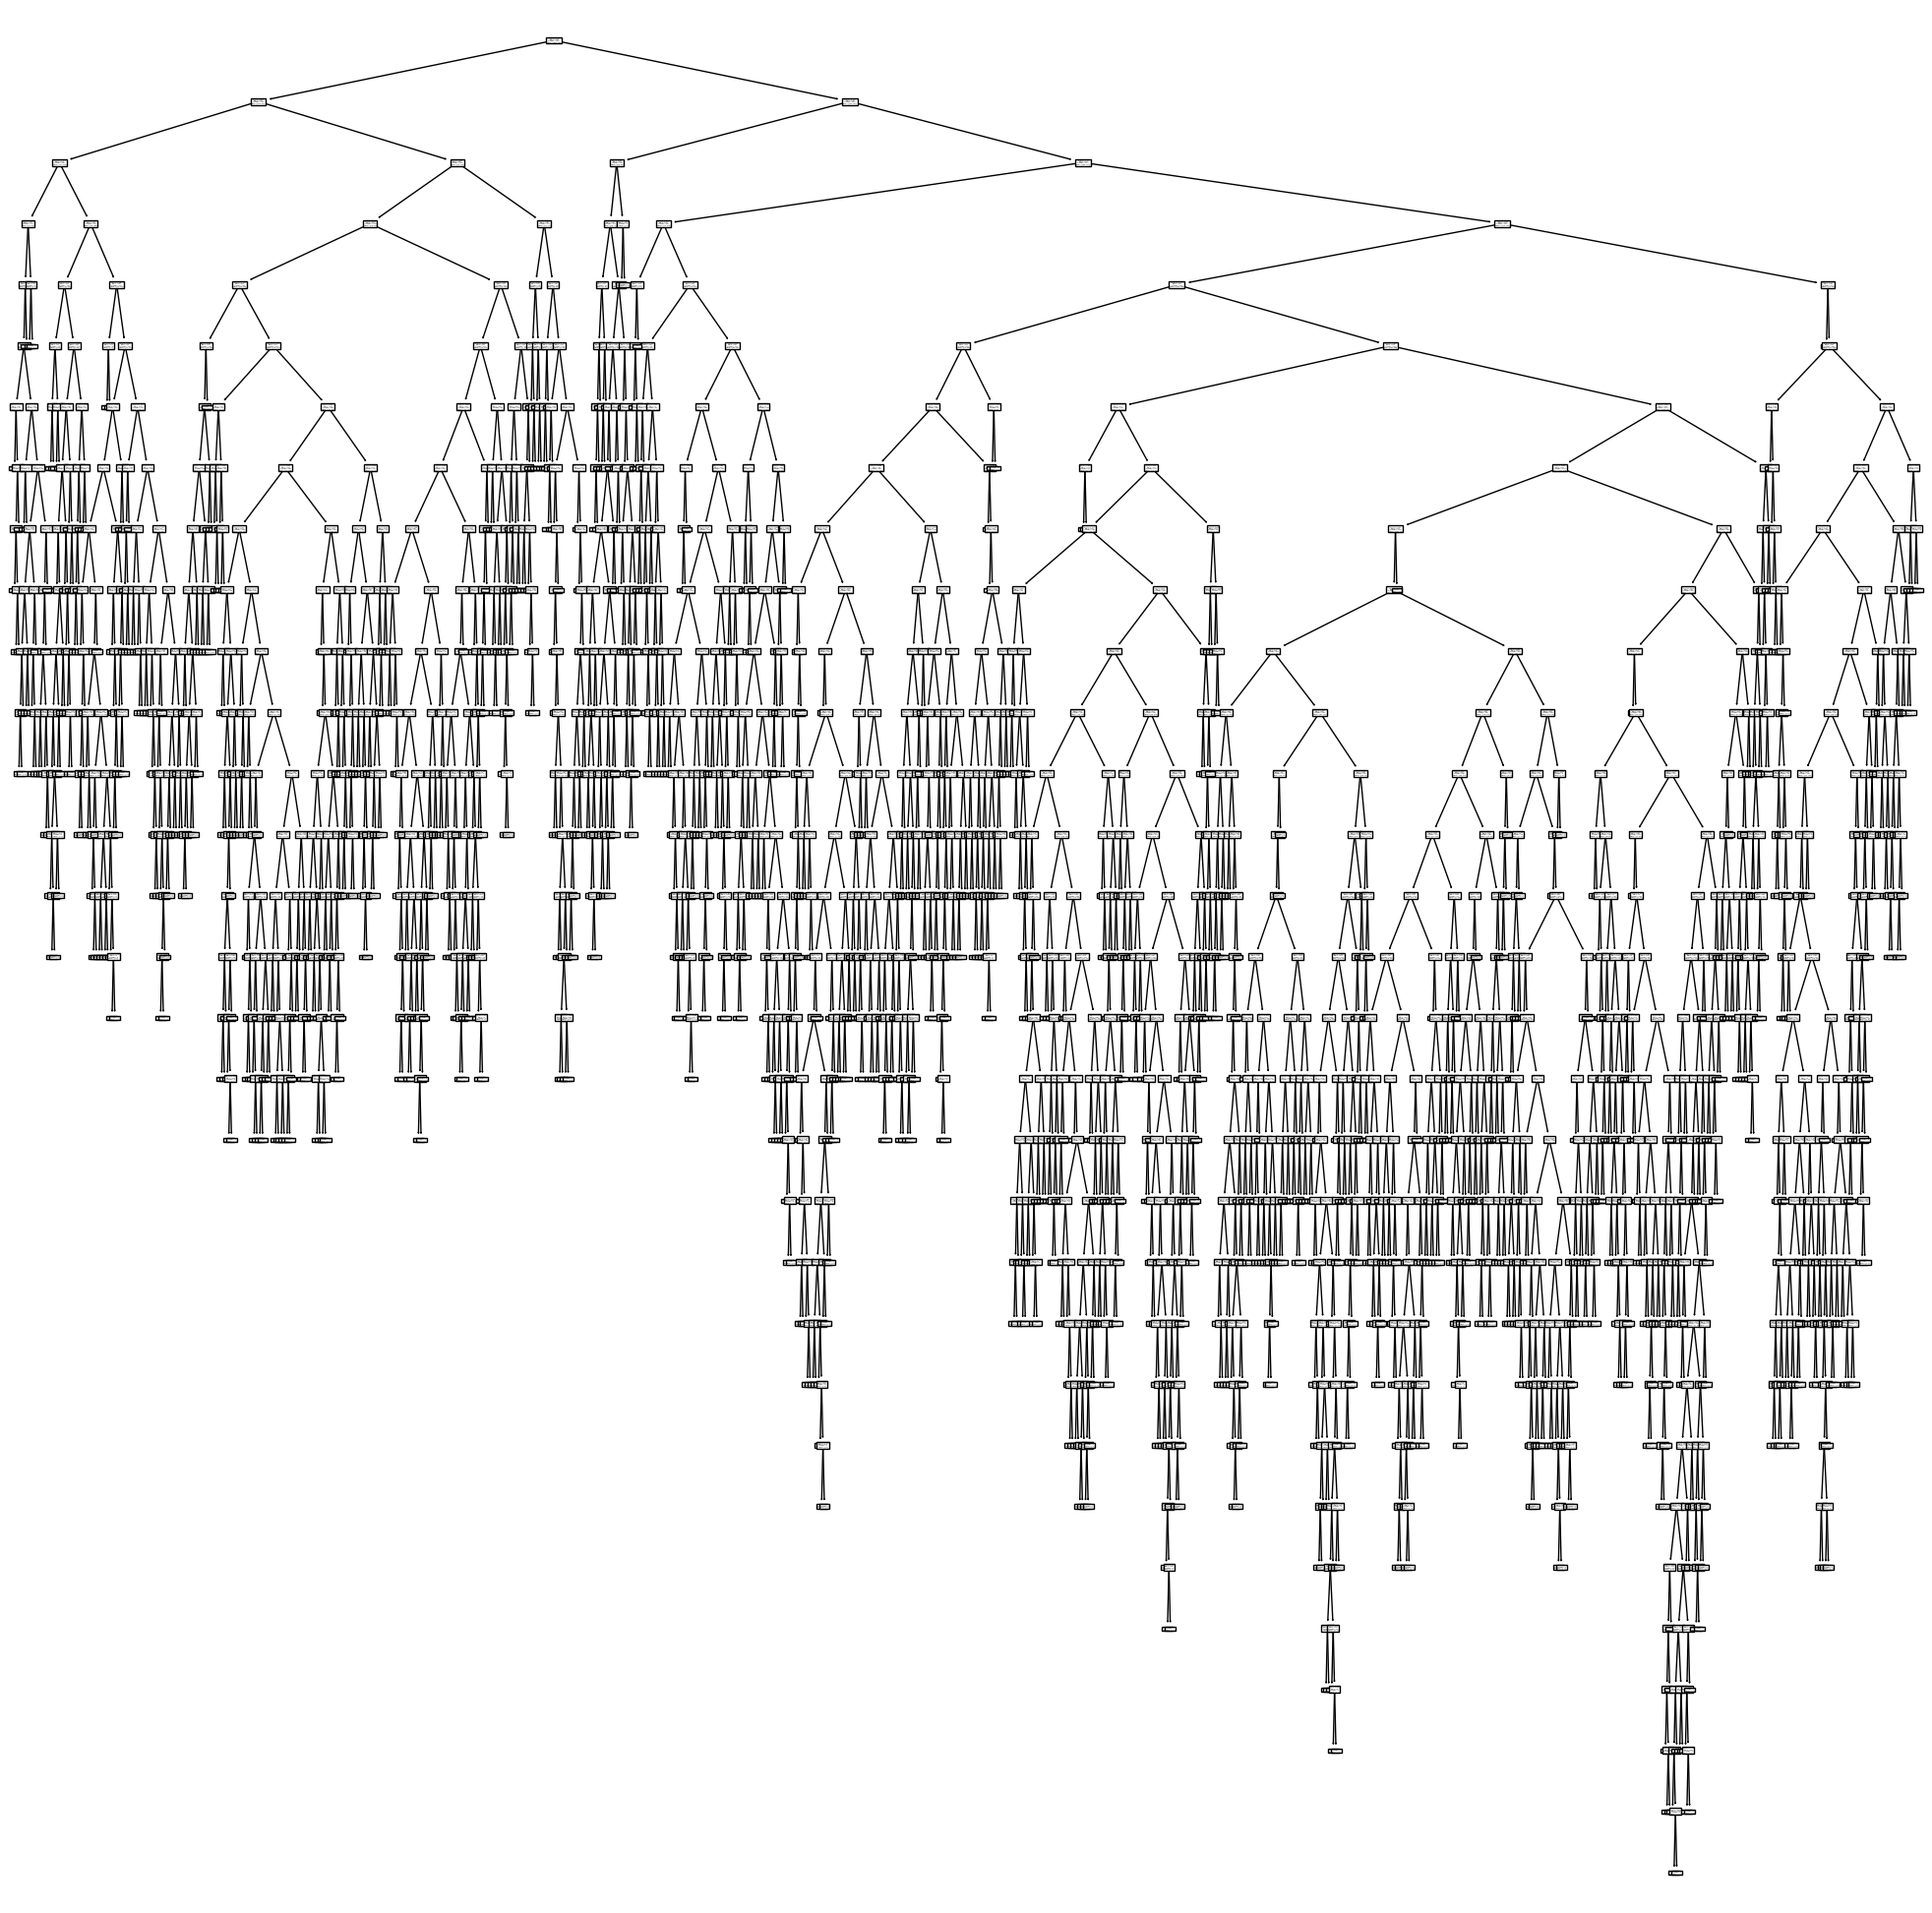

In [103]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(dc)


In [110]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [105]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [107]:
model = BernoulliNB()
model.fit(X_train, y_train)


C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [108]:
predictions = model.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


In [112]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1109
           1       0.00      0.00      0.00       644

    accuracy                           0.63      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.40      0.63      0.49      1753



C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RaThoD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
